In [39]:
import numpy as np
from scipy.stats import norm #нормальний розподіл 
from scipy.stats import t #розподіл Стьюдента
from scipy.stats import chi2 #розподіл Хі-квадрат
import math
import itertools

# Завдання 1

In [34]:
gamma = 0.01
Z_gamma = 2.575

n1 = 100
n2 = 10000
n3 = 1000000

def gen_values(n):
    vals = norm.rvs(size = n)
    X = np.sum(vals) / n  #вибіркове середнє
    S = np.sum([(i - X)**2 for i in vals]) / n #вибіркова дисперсія
    return X, S    

A. Побудувати довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., які мають нормальний розподіл, але дисперсія невідома.

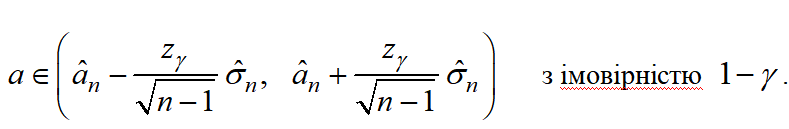

In [56]:
def interval_for_expected_value_1(n): #довірчий інтервал для матсподівання при невідомій дисперсії
    X, S = gen_values(n)
    df = n-1 #ступенів свободи розподілу Стьюдента
    Z_gamma = t.ppf((1+gamma)/2, df, loc=0, scale=1)
    print("Z_gamma=", Z_gamma)
    left = X - (Z_gamma * math.sqrt(S)) / math.sqrt(n-1)
    right = X + (Z_gamma * math.sqrt(S)) / math.sqrt(n-1)
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"a належить ({left}, {right}) з імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_1(n1)
interval_2 = interval_for_expected_value_1(n2)
interval_3 = interval_for_expected_value_1(n3)

Z_gamma= 0.012565164145454548
кількість спостережень = 100
вибіркове середнє = 0.06712911961648542
вибіркова дисперсія 1.0594749609965999
a належить (0.0658292615974881, 0.06842897763548274) з імовірністю 0.99
довжина довірчого інтервалу = 0.002599716037994637

Z_gamma= 0.012533782929290459
кількість спостережень = 10000
вибіркове середнє = -0.0022315504505620587
вибіркова дисперсія 0.9916991890165191
a належить (-0.002356373234305004, -0.0021067276668191135) з імовірністю 0.99
довжина довірчого інтервалу = 0.00024964556748589047

Z_gamma= 0.01253347264193246
кількість спостережень = 1000000
вибіркове середнє = -0.0001602461384336327
вибіркова дисперсія 0.9992349741640113
a належить (-0.00017277482220744023, -0.00014771745465982518) з імовірністю 0.99
довжина довірчого інтервалу = 2.5057367547615052e-05



B. Побудувати довірчий інтервал для математичного сподівання у припущенні, що спостерігаються в.в., розподіл яких невідомий.
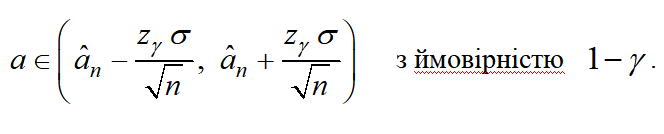

замість дисперсії використали її незміщену оцінку: 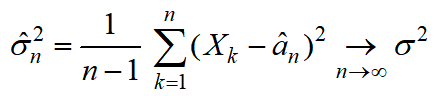

In [36]:
def interval_for_expected_value_2(n): #довірчий інтервал для матсподівання при невідомому розподілі
    X, S = gen_values(n1)
    S = (S * n) / (n-1)
    left = X - (Z_gamma * math.sqrt(S)) / math.sqrt(n)
    right = X + (Z_gamma * math.sqrt(S)) / math.sqrt(n)
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"a належить ({left}, {right}) з імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_2(n1)
interval_2 = interval_for_expected_value_2(n2)
interval_3 = interval_for_expected_value_2(n3)

кількість спостережень = 100
вибіркове середнє = -0.28516710634119047
вибіркова дисперсія 0.9008898841763784
a належить (-0.529573795862304, -0.04076041682007689) з імовірністю 0.99
довжина довірчого інтервалу = 0.4888133790422271

кількість спостережень = 10000
вибіркове середнє = 0.022740919765434544
вибіркова дисперсія 0.7988262932819199
a належить (-0.00027367905985986943, 0.04575551859072896) з імовірністю 0.99
довжина довірчого інтервалу = 0.04602919765058883

кількість спостережень = 1000000
вибіркове середнє = -0.1249269641183007
вибіркова дисперсія 0.807313177631204
a належить (-0.12724061727692904, -0.12261331095967236) з імовірністю 0.99
довжина довірчого інтервалу = 0.004627306317256677



C. Побудувати довірчий інтервал для дисперсії у припущенні, що
спостерігаються в.в., які мають нормальний розподіл.
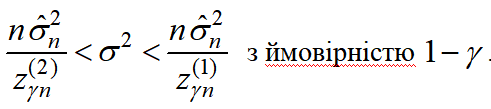

In [57]:
def interval_for_expected_value_3(n): #довірчий інтервал для дисперсії при нормальному розподілі
    X, S = gen_values(n1)
    df = n-1 #ступенів свободи розподілу хі-квадрат
    Z1 = chi2.ppf((1-gamma)/2, df, loc=0, scale=1)
    Z2 = chi2.ppf((1+gamma)/2, df, loc=0, scale=1)
    print("Z1=", Z1, "Z2=", Z2)
    left = n * S / Z2 
    right = n * S / Z1 
    print("кількість спостережень =", n)
    print("вибіркове середнє =", X)
    print("вибіркова дисперсія", S)
    print(f"a належить ({left}, {right}) з імовірністю {1-gamma}")
    print(f"довжина довірчого інтервалу = {abs(right-left)}\n")
    return [left, right]

interval_1 = interval_for_expected_value_3(n1)
interval_2 = interval_for_expected_value_3(n2)
interval_3 = interval_for_expected_value_3(n3)

Z1= 98.15857401686063 Z2= 98.50990999168656
кількість спостережень = 100
вибіркове середнє = 0.10086466848604594
вибіркова дисперсія 0.9978884898575118
a належить (1.0129828460321662, 1.016608584478932) з імовірністю 0.99
довжина довірчого інтервалу = 0.003625738446765947

Z1= 9996.561103264923 Z2= 10000.105788656338
кількість спостережень = 10000
вибіркове середнє = -0.1061127062625811
вибіркова дисперсія 0.9589928100475683
a належить (0.9589826650988091, 0.9593227112215188) з імовірністю 0.99
довжина довірчого інтервалу = 0.0003400461227096585

Z1= 999980.608451331 Z2= 1000016.058424944
кількість спостережень = 1000000
вибіркове середнє = -0.03829572980247867
вибіркова дисперсія 1.021279090849969
a належить (1.0212626909796978, 1.021298895417205) з імовірністю 0.99
довжина довірчого інтервалу = 3.62044375072923e-05



# Завдання 2